In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.lines import Line2D

In [2]:
import os
main_folder=os.getcwd()

In [3]:
file_names = ['aki7Day_PreOp_trainBy2038_ROC_AUC_ACC_PPV_NPV_F1_873testData_esrd_dropped.csv',
              'aki7Day_IntraOp+preOP_ROC_AUC_ACC_PPV_NPV_F1_TestData.csv', 
              'aki7Day_post_full_model_ROC_AUC_ACC_PPV_NPV_F1_TestData.csv']

In [4]:
roc = [pd.read_csv(main_folder+'/'+file_name) for file_name in file_names]

C:\Users\srajanpaliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


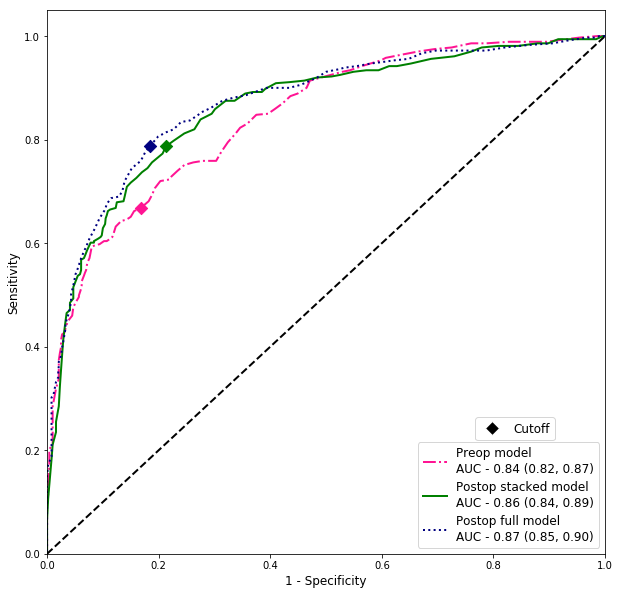

In [5]:
risknames = ['Preop model', 'Postop stacked model', 'Postop full model']
#### Change the values below####
################################
thresholds = [.43, .41, .4]    #
lower_auc = [0.87, 0.89, 0.90]#
upper_auc = [0.82, 0.84, 0.85] #
################################
plt.figure(figsize=(10,10))
lw=2
colors = cycle(['deeppink', 'green', 'navy'])
linestyles=cycle(['-.', '-', ':'])
lines = []
cut_off = [Line2D([0], [0], marker='D', color='w', label='Cutoff',
                          markerfacecolor='black', markersize=10)]
for i, color, linestyle in zip(range(3), colors, linestyles):
    lines.append(plt.plot([1,]+list(1-roc[i]['specificity']),
                         [1,]+ list(roc[i]['sensitivity']),
                         color=color, lw=3,linestyle=linestyle, linewidth=lw,
                         label='{0}\nAUC - {1:0.2f} ({2:.2f}, {3:.2f})'.format(
                                   risknames[i],
                                   roc[i]['auc'].iloc[0],
                                   upper_auc[i],
                                   lower_auc[i]))[0])
    plt.scatter([(1-roc[i]['specificity']).iloc[int(thresholds[i]*100)]],
                          [(roc[i]['sensitivity']).iloc[int(thresholds[i]*100)]],
                          s=[75], marker='D', c=color, label='Cutoff')
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity',fontsize='large')
plt.ylabel('Sensitivity', fontsize='large')
first_legend = plt.legend(handles =lines, loc="lower right", fontsize='large')
ax = plt.gca().add_artist(first_legend)
plt.legend(handles =cut_off, bbox_to_anchor=(.91, .23), loc='center right', borderaxespad=0., fontsize='large')
plt.savefig("ROC-AKI.eps", format='eps')
plt.savefig("ROC-AKI.png")
plt.show()
